# *Bike Rentals by Registered and Casual Riders*

______
### Luke Dengler
### Numerical Methods and Statistics - End of Semester Project

_____

This project will analyze the effect of a few different variables on the number of bike rentals at a bike sharing station in Washington, DC. The variables which will be analyzed are the temperature and the weather conditions on a scale of 1-4. Hopefully we will be able to see trends in the number of rentals as the weather and temperature change.


## Importing the data set

The file containing the data will be read in and managed pandas package.

(Imports for the project are also made here)




In [178]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import scipy.stats as ss
import seaborn as sns
import scipy.optimize
sns.set_style('whitegrid')
sns.set_context('notebook')


In [179]:
#the data is read in from the csv
all_data = pd.read_csv('Dengler_L_Project/train.csv')
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetimes     10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
counts        10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


In [180]:
#The datetime column is converted to useble dates instead of the string they are
dates = pd.to_datetime(all_data.datetimes)


### Checking for missing data

We will now check for unsual data. The first check will be whether any numbers are NaN values or above a certain value.

Each list of values is checked for having bad values by checking that each element of the array is both valid and is in a reasonable range for the data it is describing.

In the following cell the number of bad values is counted and if a list contains no bad values a message stating such is printed out.

In [181]:
badSeasonCount = (np.logical_and(np.isnan(all_data.season), all_data.season>4))
total=0
for i in badSeasonCount:
    if(i):
        total += 1
if(total ==0):
    print("None of the 'season' data is invalid")

    
badHolidayCount = (np.logical_and(np.isnan(all_data.holiday), all_data.holiday>1))
total=0
for i in badHolidayCount:
    if(i):
        total += 1
if(total ==0):
    print("None of the 'holiday' data is invalid")
    
    
badWorkCount = (np.logical_and(np.isnan(all_data.workingday), all_data.workingday>1))
total=0
for i in badWorkCount:
    if(i):
        total += 1
if(total ==0):
    print("None of the 'workingDay' data is invalid")
    
    
badWeatherCount = (np.logical_and(np.isnan(all_data.weather), all_data.weather>4))
total=0
for i in badWeatherCount:
    if(i):
        total += 1
if(total ==0):
    print("None of the 'weather' data is invalid")
    
    
badTempCount = (np.logical_and(np.isnan(all_data.temp), all_data.temp>50))
total=0
for i in badTempCount:
    if(i):
        total += 1
if(total ==0):
    print("None of the 'temp' data is invalid")
    
    
badaTempCount = (np.logical_and(np.isnan(all_data.atemp), all_data.atemp>50))
total=0
for i in badaTempCount:
    if(i):
        total += 1
if(total ==0):
    print("None of the 'atemp' data is invalid")
    
    
badHumidCount = (np.logical_and(np.isnan(all_data.humidity), all_data.humidity>4))
total=0
for i in badHumidCount:
    if(i):
        total += 1
if(total ==0):
    print("None of the 'humidity' data is invalid")
    
    
badWindCount = (np.logical_and(np.isnan(all_data.windspeed), all_data.windspeed>25))
total=0
for i in badWindCount:
    if(i):
        total += 1
if(total ==0):
    print("None of the 'windspeed' data is invalid")
    
    
badCasualCount = (np.logical_and(np.isnan(all_data.casual), all_data.casual>1000))
total=0
for i in badCasualCount:
    if(i):
        total += 1
if(total ==0):
    print("None of the 'casual' data is invalid")
    
badRegisteredCount = (np.logical_and(np.isnan(all_data.registered), all_data.registered>1000))
total=0
for i in badRegisteredCount:
    if(i):
        total += 1
if(total ==0):
    print("None of the 'registered' data is invalid")   

badCountsCount = (np.logical_and(np.isnan(all_data.counts), all_data.counts>1000))
total=0
for i in badCountsCount:
    if(i):
        total += 1
if(total ==0):
    print("None of the 'counts' data is invalid")  
    

print("\n\nAll of these printing as such shows that there should be no missing or errored data.")


None of the 'season' data is invalid
None of the 'holiday' data is invalid
None of the 'workingDay' data is invalid
None of the 'weather' data is invalid
None of the 'temp' data is invalid
None of the 'atemp' data is invalid
None of the 'humidity' data is invalid
None of the 'windspeed' data is invalid
None of the 'casual' data is invalid
None of the 'registered' data is invalid
None of the 'counts' data is invalid


All of these printing as such shows that there should be no missing or errored data.


#### Under the assumption that there is no wrong data we can proceed without fixing the data

### A First Look

Plotting the number of casual and registered riders for the first 168 points will give us about 7 days of data to look at.

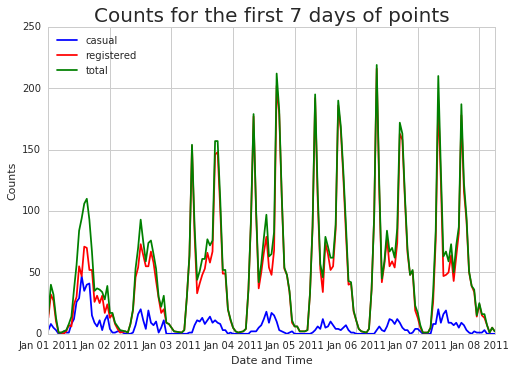

In [182]:
plt.plot(dates[0:168], all_data.casual[0:168], 'b', label = "casual")
plt.plot(dates[0:168], all_data.registered[0:168], 'r', label = "registered")
plt.plot(dates[0:168], all_data.counts[0:168], 'g', label = "total")
plt.legend(loc = 'upper left')
plt.xlabel('Date and Time')
plt.ylabel('Counts')
plt.title("Counts for the first 7 days of points", fontsize = 20)
plt.figure(figsize=(15,5), dpi = 1000)
plt.gcf().autofmt_xdate()
plt.show()

#### Seeing these 7 peaks for the for 7 days I can see that there is a are not many rentals during the late night hours, using this information I am going to remove these late night hours from the data to be analyzed. I am doing this to remove many of the 0 rental points, that occur during the night hours, from my analysis


The $isDaytime$ array will hold $True$ if the value is between 7am and 9pm and $false$ otherwise.

By knowing which locations in the array are during the day time we can make an array that contains only the values from the day time and keeps them in order.

After this cell is run, slicing a data array by this $isDaytime$ array will remove all of the late night data points.

In [183]:
#extracting the hour from the date time
hours =[]
for date in dates:
    hours.append(date.hour)

isDaytime = []
for i in hours:
    if(7<i and i<21):
        isDaytime.append(True)
    else:
        isDaytime.append(False)
    

### How many rentals are lost to removing this data

By comparing the total number of rentals over the full data set to the total number of rentals in the reduced set we can see approximatley how much of the data we lost.

In [184]:
totalRents = sum(all_data.counts)
reducedRents = sum(all_data.counts[isDaytime])

print("Total Rentals: {} \n Reduced Rentals: {}".format(totalRents, reducedRents))
print("We maintained {:.4}% of the rentals.".format(reducedRents/totalRents*100))

Total Rentals: 2085476 
 Reduced Rentals: 1705449
We maintained 81.78% of the rentals.


#### Even though we cut 11 hours of every day out of the data set we only lost about 20% of the total rentals that were made in the 2 years.

#### This also tells us that 81.8% of all rentals occured in only 13 hours of each day.

## Weather and Count Correlation

Using the 1-4 weather scale (see Appendix B) we will compare the weather to the number of rentals.

### First Lets plot the relationship
##### Using a violin plot we can see how the number of rentals is distributed

A violin plot is used to show the distribution of the Y-Values that correspond to a certain X-value. The "violin" at each X-value is wider where there are more points and very thin where there are few values. This style of plot works best for when ther are a limited number of discrete X-values with a high number of Y-Values each.

We will be plotting the weather values on the x-axis and the number of rentals on the y-axis

(0, 1200)

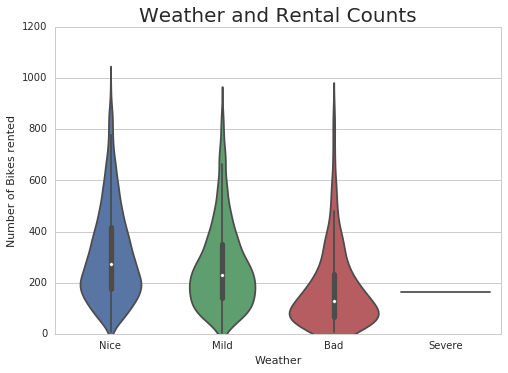

In [185]:
xvals = all_data.weather[isDaytime]
yvals = all_data.counts[isDaytime]

fig = sns.violinplot(xvals, yvals)
plt.gca().set_xticklabels(['Nice', 'Mild', 'Bad', 'Severe'])
plt.xlabel("Weather")
plt.ylabel("Number of Bikes rented")
plt.title("Weather and Rental Counts", fontsize = 20)
plt.ylim([0, 1200])


##### Note that the severe weather category has very few entries so the violin shape has been compressed to a very short line.

### Correlation and Regression
##### Null Hypothesis: There is no correlation between the weather and the number of rentals.

Will will determine whether there is a correlation between the weather and the rental count using the spearman correlation test.

In [186]:
cor_weatherAndCounts = ss.spearmanr(xvals, yvals)[1]

print("P-value: {:.3}".format(cor_weatherAndCounts))

P-value: 1.35e-60


### Correlation Results:
#### P-value = $1.35 * 10^-60$

This p-value is less than .05, we reject the null hypothesis and conclude there is a correlation between the weather and the number of rentals.

We can now try to make a regression for this relationship. The relation beween these two values seems to be **linear**.


#### Linear Model:
Starting with a linear model we will optimize this equation:
$$ R = \beta_0 * W + \beta_1 $$
Where:
$$R = Number\ of\ Rentals,\ \ W = Weather\ Condition\ Number $$


The defined function takes in values for $\beta_0$ and $\beta_1$ and returns what the sum of the sum of the squares of the residuals.

The optimize funtion will find values for $\beta_0$ and $\beta_1$ which minimize this total.

In [187]:
def bestFit(x, b0, b1):
    '''This function uses beta values an an x array to make a yHat value '''
    return x*b0 + b1
    
def SSR(args):
    '''Given an array of 2 betas, the sum of the squares of the residuals is calcualted by using the previous function 
    for a yHat then summing the square of the difference between the '''
    b0 = args[0]
    b1 = args[1]
    yhat = bestFit(xvals, b0, b1)
    ssr = np.sum((yhat - yvals)**2)
    return ssr

optResult = scipy.optimize.minimize(SSR, x0=[-75, 300])

print("B0 = {:.4}    B1 = {:.4}".format(optResult.x[0], optResult.x[1]))

B0 = -58.44    B1 = 370.9


#### Results of minimizing the sum of the squares of the residuals
The line that was determined to best fit the graph was:

$$ R = -58.44  * W + 370.9 $$

Now we will plot this line and the residuals:


(0, 1200)

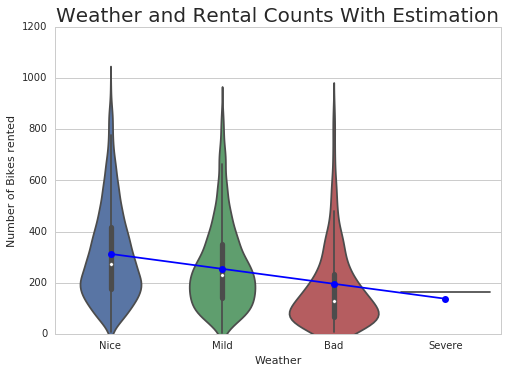

In [188]:
fig = sns.violinplot(xvals, yvals)
plt.plot([0, 1, 2, 3], bestFit(np.array([1, 2, 3, 4]), optResult.x[0], optResult.x[1]), 'bo-')
#the negative 1 adjustment in the x-values is an adjustmen to make the line allign properly. It has no effect on calculations
plt.gca().set_xticklabels(['Nice', 'Mild', 'Bad', 'Severe'])
plt.xlabel("Weather")
plt.ylabel("Number of Bikes rented")
plt.title("Weather and Rental Counts With Estimation", fontsize = 20)
plt.ylim([0, 1200])

#### We can see that the line fits across the median values fairly well and is a little high to compensate for the tall peaks.

### Histogramming the residuals:

Taking the expected counts subtracting the actual rental count for each weather value will give us the residuals which we will plot.

We will also run a Shapiro-Wilkes test to see if the residuals are normally distributed.

###### Null Hypothesis: The data is normally distributed.

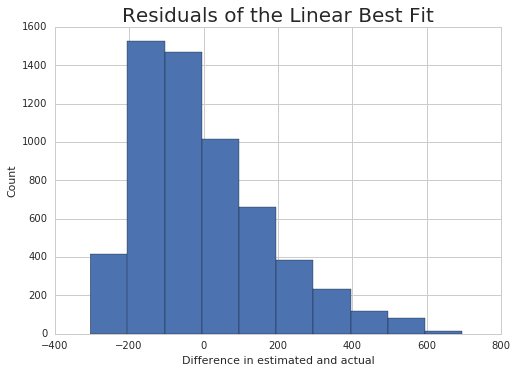

In [189]:
resids = yvals - bestFit(xvals, optResult.x[0], optResult.x[1])

plt.hist(resids)
plt.title("Residuals of the Linear Best Fit", fontsize = 20)
plt.xlabel("Difference in estimated and actual")
plt.ylabel("Count")


In [190]:
normality = ss.shapiro(resids)
print("P-value:", normality[1])

P-value: 1.401298464324817e-45


/opt/conda/lib/python3.5/site-packages/scipy/stats/morestats.py:1329: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


#### With a p-value much less than .05 we reject the null hypothesis. The residuals are not normal. This tells us that the regression line we chose to use was not a good model for the data.

#### Perhaps using a different model equation would help with this, or there are simply too many different variables to use a single variable to predict counts despite the strong correlation.

##### It should be noted that the Shapiro-Wilkes test is not accurate over 5000 samples, and we used ~6000 samples, however the result is so far from .05 that we will assume this limitation will not affect our results.
______
______
______

## Temperature and Count Correlation

Using the temperature in degree Celsius and the number of rentals.

To do this we will go through the same process as before.

#### First Lets plot the relationship



(0, 1100)

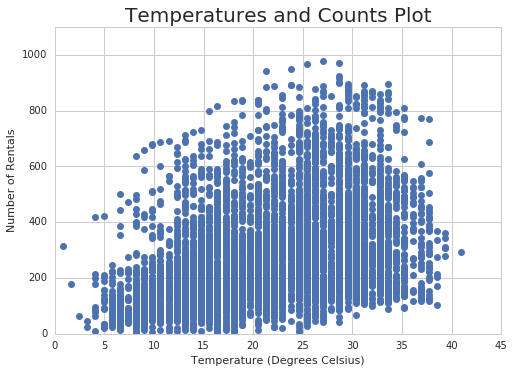

In [191]:
xvals2 = all_data.temp[isDaytime]
yvals2 = all_data.counts[isDaytime]

#fig = sns.violinplot(all_data.temp[isDaytime], all_data.counts[isDaytime])
plt.plot(xvals2, yvals2, 'o')
plt.xlabel("Temperature (Degrees Celsius)")
plt.ylabel("Number of Rentals")
plt.title("Temperatures and Counts Plot", fontsize = 20)
plt.ylim([0, 1100])

### Testing for a correlation between Temperature and Rental Counts
Using a spearman correlation test we will see if there is a correlation.

###### Null Hypothesis: The temperature and rental counts are not correlated.

In [192]:
cor_tempAndCount = ss.spearmanr(xvals2, yvals2)[1]

print("P-value: {:.4}".format(cor_tempAndCount))


P-value: 8.036e-290


### Correlation Results:
#### P-value = $8.036 x 10 ^ {-290}$

This p-value is less than .05, we reject the null hypothesis and conclude there is a correlation between the temperature and the number of rentals.

We can now try to make a regression for this relationship. The relation beween the data could be a **negative polynomial**. This also makes sense in the context, as temperatures get to be too far from a comfortable range the willingness to ride a bike decreases.


#### Polynomial Model:
Starting with a linear model we will optimize this equation:
$$ R = \beta_0 *T^2  + \beta_1 * T + \beta_2 $$
Where:
$$R = Number\ of\ Rentals,\ \ T = Temperature\ in\ C^\circ$$


This time the function will take in values for $\beta_0$, $\beta_1$, and $\beta_2$ and returns what the sum of the sum of the squares of the residuals.


BasinHopping is also used for this equation to minimize the residiuals. This method will avoid getting caught in local minimums by "hopping" out of "basins".

In [193]:

def bestFit2(x, b0, b1, b2):
    '''This takes in 3 betas to make a yHat for the temperature data'''
    return b0*x**2 + x*b1 + b2
    
def SSR2(args):
    '''This uses the same method as in the first example to calculate the Sum of the squares
    of the residual.'''
    b0 = args[0]
    b1 = args[1]
    b2 = args[2]
    yhat = bestFit2(xvals2, b0, b1, b2)
    ssr = np.sum((yhat - yvals2)**2)
    return ssr

print(bestFit2(10, -5,100,0))


#optResult2 = scipy.optimize.minimize(SSR2, x0=[0, 0,0])
optResult2 = scipy.optimize.basinhopping(SSR2, x0 = [-5,25,-50], niter = 5000)
print(optResult2)
beta0 = optResult2.x[0]
beta1 = optResult2.x[1]
beta2 = optResult2.x[2]
print("B0 = {:.4}    B1 = {:.4}    B2 = {:.4}".format(optResult2.x[0], optResult2.x[1], optResult2.x[2]))

500
                        fun: 158542271.76543796
 lowest_optimization_result:       fun: 158542271.76543796
 hess_inv: array([[  1.85700794e-08,  -7.84274559e-07,   7.04873597e-06],
       [ -7.84274559e-07,   3.43780272e-05,  -3.24519579e-04],
       [  7.04873597e-06,  -3.24519579e-04,   3.33216258e-03]])
      jac: array([ 0.,  0.,  0.])
  message: 'Optimization terminated successfully.'
     nfev: 110
      nit: 8
     njev: 22
   status: 0
  success: True
        x: array([ -0.35395953,  24.27707356, -48.65081377])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 5000
                       nfev: 136124
                        nit: 5000
                       njev: 15225
                          x: array([ -0.35395953,  24.27707356, -48.65081377])
B0 = -0.354    B1 = 24.28    B2 = -48.65


#### Results of minimizing the sum of the squares of the residuals
The line that was determined to best fit the graph was:

$$ R = -0.354 * T^2 + 24.28 * T -48.65$$

Now we will plot this line and the residuals:

(0, 1200)

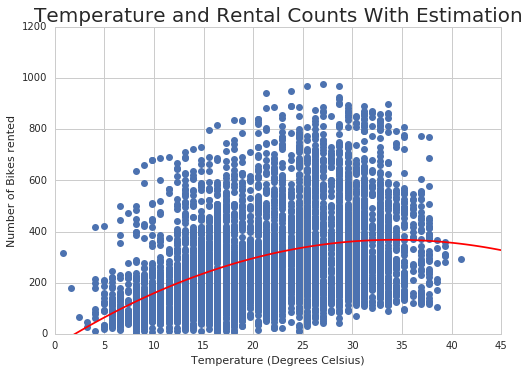

In [194]:
plt.plot(xvals2, yvals2, 'o')
plt.plot(np.linspace(0, 45,100) , bestFit2(np.linspace(0, 45,100), beta0, beta1, beta2), 'r-')
plt.xlabel("Temperature (Degrees Celsius)")
plt.ylabel("Number of Bikes rented")
plt.title("Temperature and Rental Counts With Estimation", fontsize = 20)
plt.ylim([0, 1200])

#### This negative exponential function fits the data fairl well, it seems to go through the middle of the data again and is still missing the upper peaks.

### Histogramming the residuals:

Again we will take the expected values from our newly optimized function and subtract the actual values 

We will also run a Shapiro-Wilkes test to see if the residuals are normally distributed.

###### Null Hypothesis: The data is normally distributed.

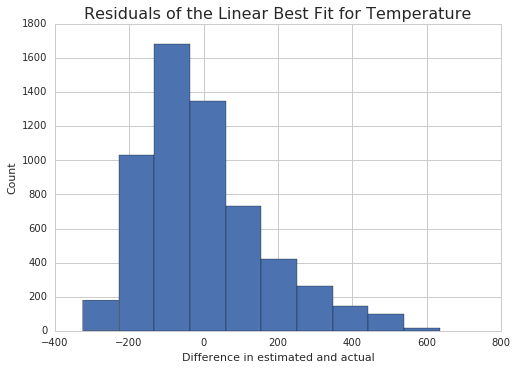

In [195]:
resids2 = yvals2 - bestFit2(xvals2, optResult2.x[0], optResult2.x[1], optResult2.x[2])

plt.hist(resids2)
plt.title("Residuals of the Linear Best Fit for Temperature", fontsize = 16)
plt.xlabel("Difference in estimated and actual")
plt.ylabel("Count")


In [196]:
normality2 = ss.shapiro(resids2)
print("P-value:", normality2[1])

P-value: 5.044674471569341e-44


/opt/conda/lib/python3.5/site-packages/scipy/stats/morestats.py:1329: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


#### With a p-value much less than .05 we reject the null hypothesis. The residuals are not normal. This tells us that the regression line we chose to use was not a good model for the data. However, looking at how the data is distributed it may be very challenging to find a best fit line that will have normally distributed residuals. We will discuss this in the conclussion.

#### Again we could use a different model to model the equation to attempt to find a better fit.

##### Again we should note that the Shapiro-Wilkes test is not accurate over 5000 samples, and we used ~6000 samples, and the result is so far from .05 that we will assume this limitation will not affect our results.
______
______
______

## Conclussion:

While both of these regressions ended up not being strong fits for the data they did give us insight to how we could further analyze the data.  

Seeing as both histograms have a very similar shape, a longer left tail and a very short right tale. This disticntly shows us that the error in our regression line is not normally distributed. This occurs because the regression line can not represent how the data has a few values with a great number of riders and then many values with fewer or even zero rentals. The high rental numbers end up pulling the average values above the bulk of the values that are down around 0 rentals. Perhaps finding another way to remove some of the consistently low values that are caused by other factors would allow for a better estimate of the values that we are interested in.  

Another possible explanation for this error could be that we are not looking at enough of the facors. Perhaps we should be looking more factors simultaneously to estimate the number of riders.  

Based on some literature, tne last consideration should be the nature of data. It is possible that the data's "random error" or "noise" is not normal but rather of a binomial or Poisson distribution. This would make sense because there is a large population of people that can use these bikes and each person has a probability of renting a bike at a given time. With this in mind we would expect a Poisson distribution of the number of rentals and this would lead to a Poisson distribution of error which more closely matches the residuals that were found.



______
______


## Finally a Visual Look at the Number of Rentals Compared to both Factors

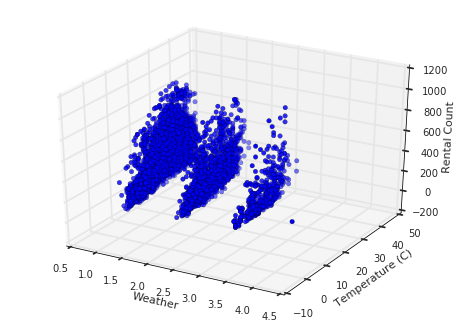

In [197]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xvals, xvals2, yvals, zdir='z', s=20, c='b', depthshade=True)

ax.set_xlabel('Weather')
ax.set_ylabel('Temperature (C)')
ax.set_zlabel('Rental Count')

plt.show() 

### What we can see in this plot

We can see the 4 distinct weather values and as the weather gets to be harsher we can see that the high numbers of rentals start to be less frequent while the low number of rentals stays fairly dense. This shows us that as we expect, people are less likely to want to rent a bike in harsh weather.

We can also see across all 4 weather values the affect of temperature. As the temperature gets low, there are no data points that have a high number of rentals.

The last very interesting thing that we can see from this plot that could not possibly be seen in the earlier plots is that as the weather gets harsher the distribution of teperatures changes drastically. The harsher weather clusters have a much lower average temperature because they have much fewer high temperature data points.

### Another Interesting Plot to Look at

Lets look at some data that has a known relationship. We will be plotting the "feels like" temperature as a function of temperature and windspeed. We know that these values are related because the "feels like" temperature is determined by the real temperature and the wind speed. Due to the sheer number of data points it has been decided to only plot every 10^{th} point to make the data more visible. We have also made the axis disproportianate to show the shape of the data a little better.

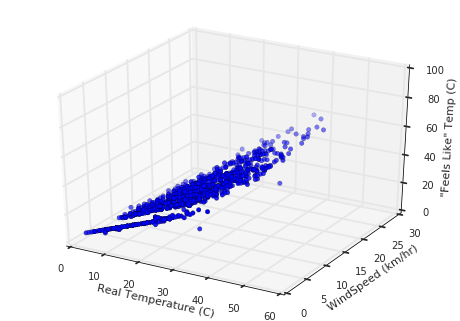

In [198]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(all_data.temp[::10], all_data.windspeed[::10],  all_data.atemp[::10], zdir='z', s=20, c='b', depthshade=True)


ax.set_xlim([0, 60])
ax.set_ylim([0, 30])
ax.set_zlim([0, 100])
ax.set_xlabel('Real Temperature (C)')
ax.set_ylabel('WindSpeed (km/hr)')
ax.set_zlabel('"Feels Like" Temp (C)')

plt.show()

This plot shows that as temperature increases so does the "Feels like" Temperature. It is hard see what how the wind affects the "Feels like" temp  because of the nature of the graphics and the minimum effect of the wind speed. Perhaps by selecting a different graphic for the points this could be more visible.

# Appendix:
_______

### A) Data Source:

Hadi Fanaee Tork using data from Capital Bikeshare  
28 May 2014  

Fanaee-T, Hadi, and Gama, Joao, Event labeling combining ensemble detectors and background knowledge, Progress in Artificial Intelligence (2013): pp. 1-15, Springer Berlin Heidelberg.

https://www.kaggle.com/c/bike-sharing-demand/data?sampleSubmission.csv

______

### B)  Data Key:

Data Fields  
* **datetimes** - hourly date + timestamp    
* **season** -  1 = spring, 2 = summer, 3 = fall, 4 = winter   
* **holiday** - whether the day is considered a holiday  
* **workingday** - whether the day is neither a weekend nor holiday  
* **weather** -  
    * 1: Clear, Few clouds, Partly cloudy, Partly cloudy   
    * 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist   
    * 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds   
    * 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog   

* **temp** - temperature in Celsius  
* **atemp** - "feels like" temperature in Celsius  
* **humidity**- relative humidity  
* **windspeed** - wind speed  
* **casual** - number of non-registered user rentals initiated  
* **registered** - number of registered user rentals initiated  
* **counts** - number of total rentals

______

### C)  Poisson Data Information Sources:  



R Data Analysis Examples: Poisson Regression  
UCLA: Statistical Consulting Group.  
Accessed 4/28/16  
http://www.ats.ucla.edu/stat/r/dae/poissonreg.htm



Germán Rodríguez  
Princeton University Course Notes. Fall 2015  
http://data.princeton.edu/wws509/notes/c4.pdf




